<a href="https://colab.research.google.com/github/N-Vaishnav9/ML-Assignment/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***ASSIGNMENT 2***
Name: Vaishnav Nimmagadda

ID: 801327504

1.a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (MSE) (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

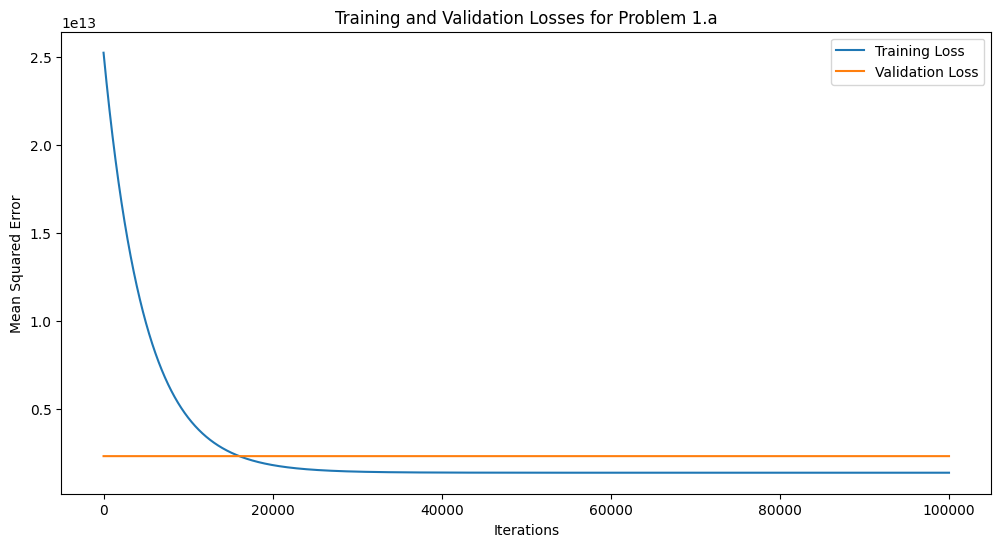

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 1/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = mean_squared_error(y, predictions)
        losses.append(loss)

    return theta, losses

# Preparing data for Problem 1.a
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_1a = housing_data[features_1a]
y = housing_data['price']
X_train_1a, X_test_1a, y_train, y_test = train_test_split(X_1a, y, test_size=0.20, random_state=42)

# Standardizing the features for Problem 1.a
scaler_1a = StandardScaler()
X_train_1a_scaled = scaler_1a.fit_transform(X_train_1a)
X_test_1a_scaled = scaler_1a.transform(X_test_1a)

# Training the model for Problem 1.a
learning_rate = 0.000099
iterations = 100000
theta_1a, losses_1a = gradient_descent(X_train_1a_scaled, y_train, learning_rate, iterations)

# Predicting on the test set and calculating the test loss for Problem 1.a
X_test_1a_b_scaled = np.hstack((np.ones((X_test_1a_scaled.shape[0], 1)), X_test_1a_scaled))  # Adding bias term
predictions_1a = X_test_1a_b_scaled.dot(theta_1a)
loss_test_1a = mean_squared_error(y_test, predictions_1a)

# Plotting the training and validation losses for Problem 1.a
plt.figure(figsize=(12, 6))
plt.plot(losses_1a, label='Training Loss')
plt.plot(np.full(iterations, loss_test_1a), label='Validation Loss')
plt.title('Training and Validation Losses for Problem 1.a')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (MSE) (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

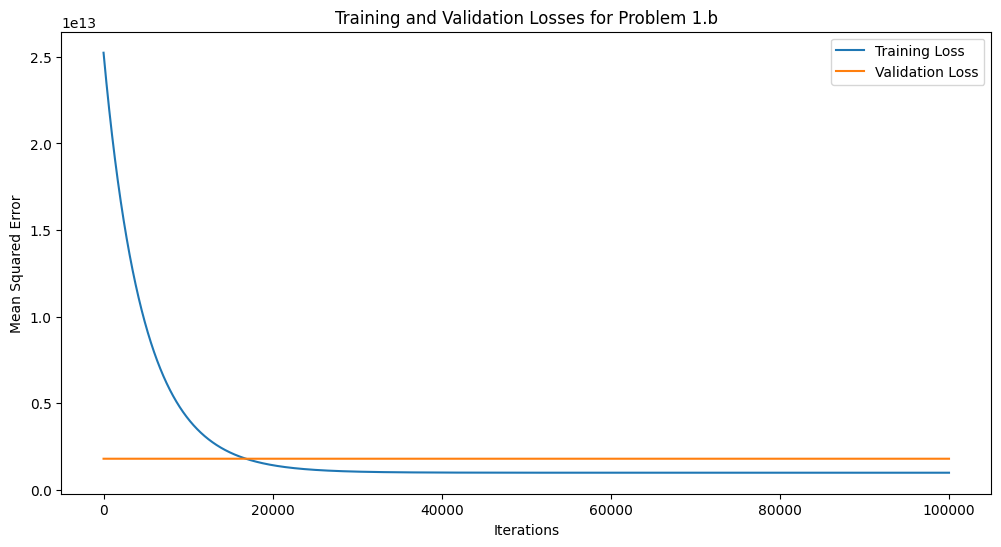

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 1/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = mean_squared_error(y, predictions)
        losses.append(loss)

    return theta, losses

# Preparing data for Problem 1.b
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
               'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_1b = pd.get_dummies(housing_data[features_1b], drop_first=True)
y = housing_data['price']
X_train_1b, X_test_1b, y_train, y_test = train_test_split(X_1b, y, test_size=0.20, random_state=42)

# Standardizing the features for Problem 1.b
scaler_1b = StandardScaler()
X_train_1b_scaled = scaler_1b.fit_transform(X_train_1b)
X_test_1b_scaled = scaler_1b.transform(X_test_1b)

# Training the model for Problem 1.b
learning_rate = 0.000099
iterations = 100000
theta_1b, losses_1b = gradient_descent(X_train_1b_scaled, y_train, learning_rate, iterations)

# Predicting on the test set and calculating the test loss for Problem 1.b
X_test_1b_b_scaled = np.hstack((np.ones((X_test_1b_scaled.shape[0], 1)), X_test_1b_scaled))  # Adding bias term
predictions_1b = X_test_1b_b_scaled.dot(theta_1b)
loss_test_1b = mean_squared_error(y_test, predictions_1b)

# Plotting the training and validation losses for Problem 1.b
plt.figure(figsize=(12, 6))
plt.plot(losses_1b, label='Training Loss')
plt.plot(np.full(iterations, loss_test_1b), label='Validation Loss')
plt.title('Training and Validation Losses for Problem 1.b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization.

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

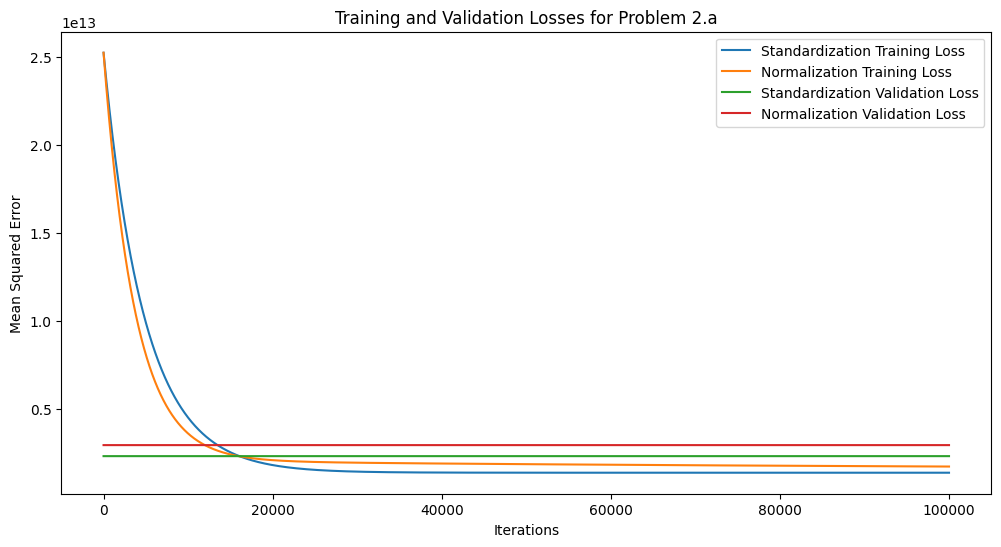

Standardization MSE: 2292827718003.741
Normalization MSE: 2920048876115.263


In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 1/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = mean_squared_error(y, predictions)
        losses.append(loss)

    return theta, losses

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Preparing data for Problem 2.a
features_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_2a = housing_data[features_2a]
y = housing_data['price']
X_train_2a, X_test_2a, y_train, y_test = train_test_split(X_2a, y, test_size=0.20, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_2a_std = standard_scaler.fit_transform(X_train_2a)
X_test_2a_std = standard_scaler.transform(X_test_2a)

# Normalization
minmax_scaler = MinMaxScaler()
X_train_2a_norm = minmax_scaler.fit_transform(X_train_2a)
X_test_2a_norm = minmax_scaler.transform(X_test_2a)

# Training and Evaluating with Standardization
learning_rate = 0.000099
iterations = 100000
theta_2a_std, losses_2a_std = gradient_descent(X_train_2a_std, y_train, learning_rate, iterations)
predictions_2a_std = np.hstack((np.ones((X_test_2a_std.shape[0], 1)), X_test_2a_std)).dot(theta_2a_std)
mse_2a_std = mean_squared_error(y_test, predictions_2a_std)

# Training and Evaluating with Normalization
theta_2a_norm, losses_2a_norm = gradient_descent(X_train_2a_norm, y_train, learning_rate, iterations)
predictions_2a_norm = np.hstack((np.ones((X_test_2a_norm.shape[0], 1)), X_test_2a_norm)).dot(theta_2a_norm)
mse_2a_norm = mean_squared_error(y_test, predictions_2a_norm)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(losses_2a_std, label='Standardization Training Loss')
plt.plot(losses_2a_norm, label='Normalization Training Loss')
plt.plot(np.full(iterations, mse_2a_std), label='Standardization Validation Loss')
plt.plot(np.full(iterations, mse_2a_norm), label='Normalization Validation Loss')
plt.title('Training and Validation Losses for Problem 2.a')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

print("Standardization MSE:", mse_2a_std)
print("Normalization MSE:", mse_2a_norm)


2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization.

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

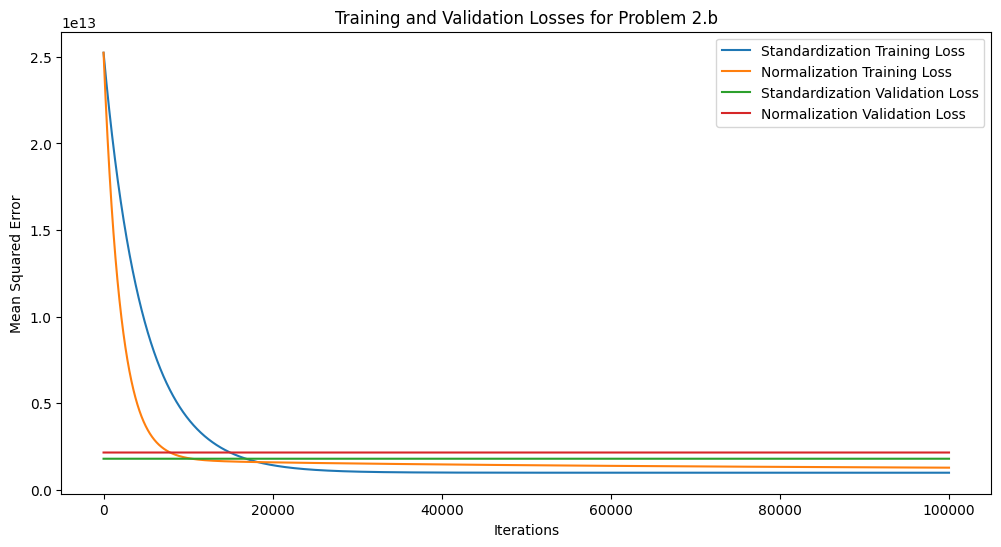

Standardization MSE: 1800192769327.9404
Normalization MSE: 2158738276456.8943


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 1/m * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = mean_squared_error(y, predictions)
        losses.append(loss)

    return theta, losses

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Preparing data for Problem 2.b
features_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
               'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_2b = pd.get_dummies(housing_data[features_2b], drop_first=True)
y = housing_data['price']
X_train_2b, X_test_2b, y_train, y_test = train_test_split(X_2b, y, test_size=0.20, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_2b_std = standard_scaler.fit_transform(X_train_2b)
X_test_2b_std = standard_scaler.transform(X_test_2b)

# Normalization
minmax_scaler = MinMaxScaler()
X_train_2b_norm = minmax_scaler.fit_transform(X_train_2b)
X_test_2b_norm = minmax_scaler.transform(X_test_2b)

# Training and Evaluating with Standardization
learning_rate = 0.000099
iterations = 100000
theta_2b_std, losses_2b_std = gradient_descent(X_train_2b_std, y_train, learning_rate, iterations)
predictions_2b_std = np.hstack((np.ones((X_test_2b_std.shape[0], 1)), X_test_2b_std)).dot(theta_2b_std)
mse_2b_std = mean_squared_error(y_test, predictions_2b_std)

# Training and Evaluating with Normalization
theta_2b_norm, losses_2b_norm = gradient_descent(X_train_2b_norm, y_train, learning_rate, iterations)
predictions_2b_norm = np.hstack((np.ones((X_test_2b_norm.shape[0], 1)), X_test_2b_norm)).dot(theta_2b_norm)
mse_2b_norm = mean_squared_error(y_test, predictions_2b_norm)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(losses_2b_std, label='Standardization Training Loss')
plt.plot(losses_2b_norm, label='Normalization Training Loss')
plt.plot(np.full(iterations, mse_2b_std), label='Standardization Validation Loss')
plt.plot(np.full(iterations, mse_2b_norm), label='Normalization Validation Loss')
plt.title('Training and Validation Losses for Problem 2.b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

print("Standardization MSE:", mse_2b_std)
print("Normalization MSE:", mse_2b_norm)


3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change the equation to compute MSE loss for the training and evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

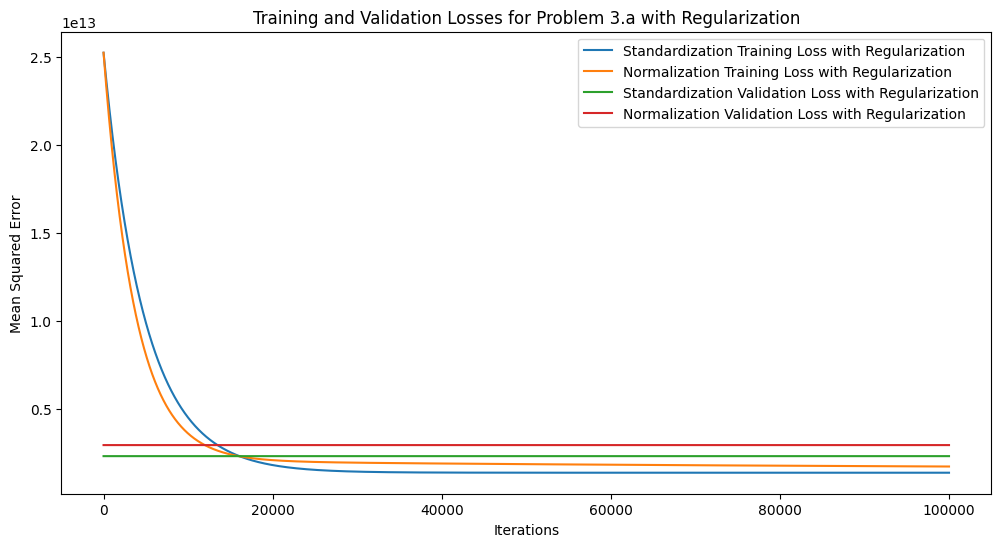

Standardization with Regularization MSE: 2292942182554.6987
Normalization with Regularization MSE: 2921539176805.0


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gradient Descent Function with Regularization
def gradient_descent_regularized(X, y, learning_rate, iterations, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        regularization = lambda_reg * theta
        regularization[0] = 0  # Bias term is not regularized
        gradients = 1/m * X.T.dot(errors) + regularization / m
        theta -= learning_rate * gradients
        reg_loss = mean_squared_error(y, predictions) + lambda_reg * np.sum(theta[1:] ** 2) / (2 * m)
        losses.append(reg_loss)

    return theta, losses

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Preparing data for Problem 3.a
features_3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_3a = housing_data[features_3a]
y = housing_data['price']
X_train_3a, X_test_3a, y_train, y_test = train_test_split(X_3a, y, test_size=0.20, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_3a_std = standard_scaler.fit_transform(X_train_3a)
X_test_3a_std = standard_scaler.transform(X_test_3a)

# Normalization
minmax_scaler = MinMaxScaler()
X_train_3a_norm = minmax_scaler.fit_transform(X_train_3a)
X_test_3a_norm = minmax_scaler.transform(X_test_3a)

# Training with Regularization - Set regularization parameter
lambda_reg = 0.1
learning_rate = 0.000099
iterations = 100000

# Standardization with Regularization
theta_3a_std, losses_3a_std = gradient_descent_regularized(X_train_3a_std, y_train, learning_rate, iterations, lambda_reg)
predictions_3a_std = np.hstack((np.ones((X_test_3a_std.shape[0], 1)), X_test_3a_std)).dot(theta_3a_std)
mse_3a_std = mean_squared_error(y_test, predictions_3a_std)

# Normalization with Regularization
theta_3a_norm, losses_3a_norm = gradient_descent_regularized(X_train_3a_norm, y_train, learning_rate, iterations, lambda_reg)
predictions_3a_norm = np.hstack((np.ones((X_test_3a_norm.shape[0], 1)), X_test_3a_norm)).dot(theta_3a_norm)
mse_3a_norm = mean_squared_error(y_test, predictions_3a_norm)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(losses_3a_std, label='Standardization Training Loss with Regularization')
plt.plot(losses_3a_norm, label='Normalization Training Loss with Regularization')
plt.plot(np.full(iterations, mse_3a_std), label='Standardization Validation Loss with Regularization')
plt.plot(np.full(iterations, mse_3a_norm), label='Normalization Validation Loss with Regularization')
plt.title('Training and Validation Losses for Problem 3.a with Regularization')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

print("Standardization with Regularization MSE:", mse_3a_std)
print("Normalization with Regularization MSE:", mse_3a_norm)


3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic (parameter update equations), but you don’t need to change the equation to compute MSE loss for the training and evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

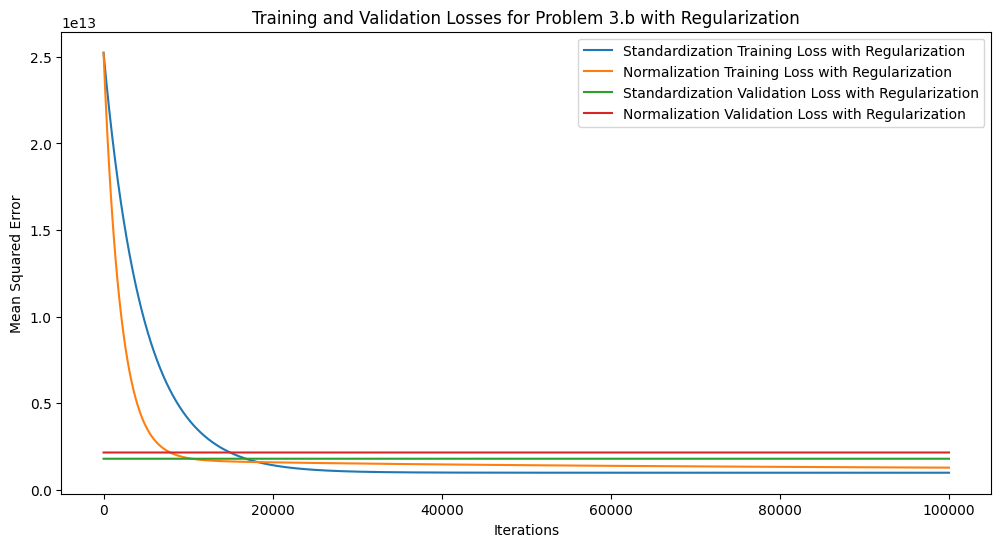

Standardization with Regularization MSE: 1800253857855.3628
Normalization with Regularization MSE: 2159855076984.7432


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Gradient Descent Function with Regularization
def gradient_descent_regularized(X, y, learning_rate, iterations, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n + 1)  # Include bias term
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        regularization = lambda_reg * theta
        regularization[0] = 0  # Bias term is not regularized
        gradients = 1/m * X.T.dot(errors) + regularization / m
        theta -= learning_rate * gradients
        reg_loss = mean_squared_error(y, predictions) + lambda_reg * np.sum(theta[1:] ** 2) / (2 * m)
        losses.append(reg_loss)

    return theta, losses

# Load the dataset
housing_data = pd.read_csv('Housing.csv')

# Preparing data for Problem 3.b
features_3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
               'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_3b = pd.get_dummies(housing_data[features_3b], drop_first=True)
y = housing_data['price']
X_train_3b, X_test_3b, y_train, y_test = train_test_split(X_3b, y, test_size=0.20, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_3b_std = standard_scaler.fit_transform(X_train_3b)
X_test_3b_std = standard_scaler.transform(X_test_3b)

# Normalization
minmax_scaler = MinMaxScaler()
X_train_3b_norm = minmax_scaler.fit_transform(X_train_3b)
X_test_3b_norm = minmax_scaler.transform(X_test_3b)

# Training with Regularization - Set regularization parameter
lambda_reg = 0.1
learning_rate = 0.000099
iterations = 100000

# Standardization with Regularization
theta_3b_std, losses_3b_std = gradient_descent_regularized(X_train_3b_std, y_train, learning_rate, iterations, lambda_reg)
predictions_3b_std = np.hstack((np.ones((X_test_3b_std.shape[0], 1)), X_test_3b_std)).dot(theta_3b_std)
mse_3b_std = mean_squared_error(y_test, predictions_3b_std)

# Normalization with Regularization
theta_3b_norm, losses_3b_norm = gradient_descent_regularized(X_train_3b_norm, y_train, learning_rate, iterations, lambda_reg)
predictions_3b_norm = np.hstack((np.ones((X_test_3b_norm.shape[0], 1)), X_test_3b_norm)).dot(theta_3b_norm)
mse_3b_norm = mean_squared_error(y_test, predictions_3b_norm)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(losses_3b_std, label='Standardization Training Loss with Regularization')
plt.plot(losses_3b_norm, label='Normalization Training Loss with Regularization')
plt.plot(np.full(iterations, mse_3b_std), label='Standardization Validation Loss with Regularization')
plt.plot(np.full(iterations, mse_3b_norm), label='Normalization Validation Loss with Regularization')
plt.title('Training and Validation Losses for Problem 3.b with Regularization')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

print("Standardization with Regularization MSE:", mse_3b_std)
print("Normalization with Regularization MSE:", mse_3b_norm)
